# [Binary Tree Python](https://github.com/dashidhy/algorithm-pattern-python/blob/master/data_structure/binary_tree.md)

In [2]:
import IPython; IPython.display.HTML('''<script>code_show=true; function code_toggle() { if (code_show){ $('div.nbinput').show(); } else { $('div.nbinput').hide(); } code_show = !code_show} $( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## [104. Maximum Depth of Binary Tree](https://leetcode.com/problems/maximum-depth-of-binary-tree/)

Easy

Given the root of a binary tree, return its maximum depth.

A binary tree's maximum depth is the number of nodes along the longest path from the root node down to the farthest leaf node.

Example 1:

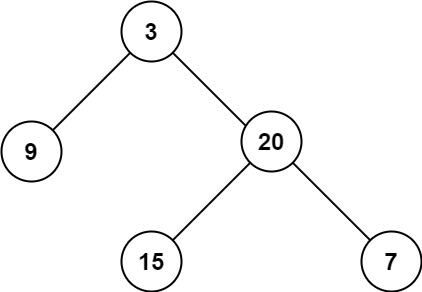

    Input: root = [3,9,20,null,null,15,7]
    Output: 3

Constraints:

    The number of nodes in the tree is in the range [0, 10^4].
    -100 <= Node.val <= 100


In [1]:
# recursive

def maxDepth(root):
    if root:
        return 1 + max(maxDepth(root.left), maxDepth(root.right))
    else:
        return 0

In [2]:
# BFS, working but slow

def maxDepth(root):
    q = deque()
    if root:
        q.append(root)

    depth = 0
    while q:
        for _ in range(len(q)):
            node = q.popleft()
            if node.left:
                q.append(node.left)
            if node.right:
                q.append(node.right)
                
        depth += 1
    return depth

## [110. Balanced Binary Tree](https://leetcode.com/problems/balanced-binary-tree/)

Easy

Given a binary tree, determine if it is height-balanced.

For this problem, a height-balanced binary tree is defined as:

    a binary tree in which the left and right subtrees of every node differ in height by no more than 1.

Example 1:

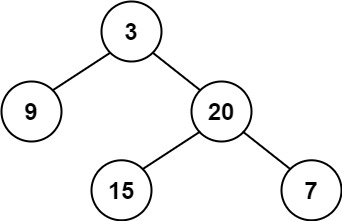

    Input: root = [3,9,20,null,null,15,7]
    Output: true
 
Constraints:

    The number of nodes in the tree is in the range [0, 5000].
    -10^4 <= Node.val <= 10^4



In [3]:
# 遞迴的過程中需要傳其它資訊（子樹深度）。寫一個遞迴函數 depth_balance 輸出完整資訊，但最後 isBalanced 只回傳需要的部份

def isBalanced(root):
    def depth_balance(root):
        '''return (depth, isBalanced)'''
        if root:
            depth_l, balanced_l = depth_balance(root.left)
            depth_r, balanced_r = depth_balance(root.right)

            return 1 + max(depth_l, depth_r), balanced_l and balanced_r and abs(depth_l - depth_r) < 2
        else:
            return 0, True

    return depth_balance(root)[1]

## [124. Binary Tree Maximum Path Sum](https://leetcode.com/problems/binary-tree-maximum-path-sum/)

Hard

A path in a binary tree is a sequence of nodes where each pair of adjacent nodes in the sequence has an edge connecting them. A node can only appear in the sequence at most once. Note that the path does not need to pass through the root.

The path sum of a path is the sum of the node's values in the path.

Given the root of a binary tree, return the maximum path sum of any path.

 
Example 2:

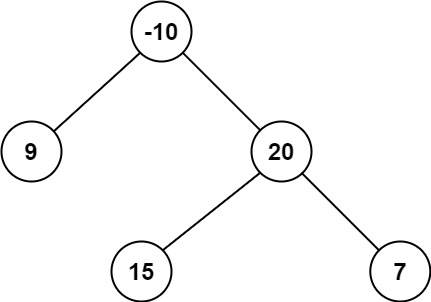

    Input: root = [-10,9,20,null,null,15,7]
    Output: 42
    Explanation: The optimal path is 15 -> 20 -> 7 with a path sum of 15 + 20 + 7 = 42.

Constraints:

    The number of nodes in the tree is in the range [1, 3*10^4].
    -1000 <= Node.val <= 1000



In [ ]:
# rsum 本身一定要出現在 mps return 的 max 裡不然 [0] 不會過

import math

def maxPathSum(root):
    def mps(root):
        '''
        return two sums: 

        1. the max path sum
        2. the restricted max path sum where one end of the path is the root
        '''
        if root:
            sum_l, rsum_l = mps(root.left)
            sum_r, rsum_r = mps(root.right)
            rsum = max(root.val, root.val + rsum_l, root.val + rsum_r)

            return max(sum_l, sum_r, rsum, root.val + rsum_l + rsum_r), rsum
        else:
            return -math.inf, -math.inf

    return mps(root)[0]

## [236. Lowest Common Ancestor of a Binary Tree](https://leetcode.com/problems/lowest-common-ancestor-of-a-binary-tree/)

Medium

Given a binary tree, find the lowest common ancestor (LCA) of two given nodes in the tree.

According to the definition of LCA on Wikipedia: “The lowest common ancestor is defined between two nodes p and q as the lowest node in T that has both p and q as descendants (where we allow a node to be a descendant of itself).”

Example 2:

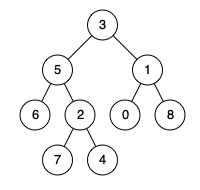

    Input: root = [3,5,1,6,2,0,8,null,null,7,4], p = 5, q = 4
    Output: 5
    Explanation: The LCA of nodes 5 and 4 is 5, since a node can be a descendant of itself according to the LCA definition.

Constraints:

    The number of nodes in the tree is in the range [2, 10^5].
    -10^9 <= Node.val <= 10^9
    All Node.val are unique.
    p != q
    p and q will exist in the tree.

In [1]:
# LeetCode 上最快解答：DFS 從下向上（divide and conquer 先遞迴傳回結果再合併）

def lowestCommonAncestor(root, p, q):
    if root in [p, q, None]:
        return root

    left = lowestCommonAncestor(root.left, p, q)
    right = lowestCommonAncestor(root.right, p, q)

    if left and right:
        return root
    elif left:
        return left
    else:
        return right

## [102. Binary Tree Level Order Traversal](https://leetcode.com/problems/binary-tree-level-order-traversal/)

Medium

Given the root of a binary tree, return the level order traversal of its nodes' values. (i.e., from left to right, level by level).


Example 1:

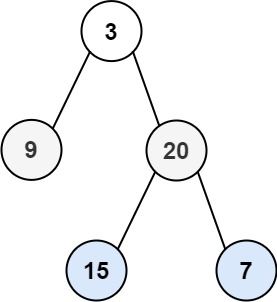

    Input: root = [3,9,20,null,null,15,7]
    Output: [[3],[9,20],[15,7]] 

Constraints:

    The number of nodes in the tree is in the range [0, 2000].
    -1000 <= Node.val <= 1000



In [ ]:
# BFS

from collections import deque

def levelOrder(root):
    q = deque()
    if root:
        q.append(root)

    res = []
    while q:
        level = []
        for _ in range(len(q)):
            node = q.popleft()
            level.append(node.val)
            if node.left:
                q.append(node.left)
            if node.right:
                q.append(node.right)
                
        res.append(level)
    return res

## [107. Binary Tree Level Order Traversal II](https://leetcode.com/problems/binary-tree-level-order-traversal-ii/)

Medium

Given the root of a binary tree, return the bottom-up level order traversal of its nodes' values. (i.e., from left to right, level by level from leaf to root).

Example 1:

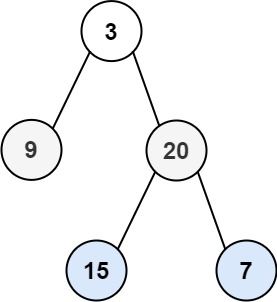

    Input: root = [3,9,20,null,null,15,7]
    Output: [[15,7],[9,20],[3]]

Constraints:

    The number of nodes in the tree is in the range [0, 2000].
    -1000 <= Node.val <= 1000

In [ ]:
# BFS 解答跟上面那題一模一樣只是 return res[::-1]。LeetCode 上速度前幾名的 BFS 解答都是這樣做的
# 或者把 res.append(level) 那行改成 res.insert(0, level)，但理論上會慢一點

# 這題也可以用 recursion

## [103. Binary Tree Zigzag Level Order Traversal](https://leetcode.com/problems/binary-tree-zigzag-level-order-traversal/)

Medium

Given the root of a binary tree, return the zigzag level order traversal of its nodes' values. (i.e., from left to right, then right to left for the next level and alternate between).

Example 1:

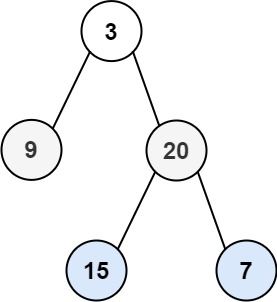


    Input: root = [3,9,20,null,null,15,7]
    Output: [[3],[20,9],[15,7]]

Constraints:

    The number of nodes in the tree is in the range [0, 2000].
    -100 <= Node.val <= 100

In [ ]:
# 作弊的解答同 107 不過在 return 前改 reverse res 裡需要 reverse 的
# 下面是不作弊的方法：每層裡 pop 和 popleft 穿插著用。看 binary tree python（主標題 link）
# 在 pop 的一層裡要 push 下一層的 node 就一定要用 appendleft 才不會一 push 就被 pop 了

from collections import deque

def zigzagLevelOrder(root):
    q = deque()
    if root:
        q.append(root)

    from_left = True
    res = []
    while q:
        level = []
        for _ in range(len(q)):
            if from_left:
                node = q.popleft()
                level.append(node.val)
                if node.left:
                    q.append(node.left)
                if node.right:
                    q.append(node.right)
            else:
                node = q.pop()
                level.append(node.val)
                if node.right:
                    q.appendleft(node.right)
                if node.left:
                    q.appendleft(node.left)

        from_left = not from_left
        res.append(level)
    return res

## [98. Validate Binary Search Tree](https://leetcode.com/problems/validate-binary-search-tree/)

Medium

Given the root of a binary tree, determine if it is a valid binary search tree (BST).

A valid BST is defined as follows:

* The left subtree of a node contains only nodes with keys less than the node's key.
* The right subtree of a node contains only nodes with keys greater than the node's key.
* Both the left and right subtrees must also be binary search trees.

Example 1:

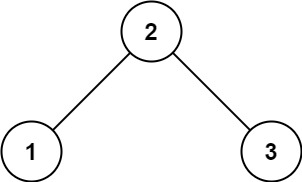

    Input: root = [2,1,3]
    Output: true 

Constraints:

    The number of nodes in the tree is in the range [1, 10^4].
    -2^31 <= Node.val <= 2^31 - 1

In [1]:
# 檢查 inorder 的結果是否 sorted

def isValidBST(root):
    lst = inorder(root)
    return all([lst[i] < lst[i+1] for i in range(len(lst)-1)])

def inorder(root):
    if not root:
        return []
    else:
        return inorder(root.left) + [root.val] + inorder(root.right)

In [ ]:
# From LeetCode

def isValidBST(root):    
    def validate(node, low=-math.inf, high=math.inf):
        '''
        verify if node is a valid BST taking values in (low, high)
        '''
        if not node:
            return True
        if node.val <= low or node.val >= high:
            return False
        
        return (validate(node.right, node.val, high) and validate(node.left, low, node.val))

    return validate(root)

## [701. Insert into a Binary Search Tree](https://leetcode.com/problems/insert-into-a-binary-search-tree/)

Medium

You are given the root node of a binary search tree (BST) and a value to insert into the tree. Return the root node of the BST after the insertion. It is guaranteed that the new value does not exist in the original BST.

Notice that there may exist multiple valid ways for the insertion, as long as the tree remains a BST after insertion. You can return any of them.

Example 1:

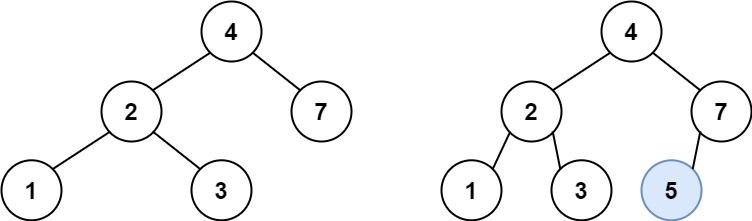

    Input: root = [4,2,7,1,3], val = 5
    Output: [4,2,7,1,3,5]

Constraints:

    The number of nodes in the tree will be in the range [0, 10^4].
    -10^8 <= Node.val <= 10^8
    All the values Node.val are unique.
    -10^8 <= val <= 10^8
    It's guaranteed that val does not exist in the original BST.

In [ ]:
# naively move to the right place and add a node

def insertIntoBST(root, val):
    if not root:
        return TreeNode(val)

    cur = root
    while cur:
        prev = cur
        if cur.val > val:
            cur = cur.left
        else:
            cur = cur.right

    if prev.val > val:
        prev.left = TreeNode(val)
    else:
        prev.right = TreeNode(val)

    return root

In [ ]:
# clean recursive solution from LeetCode

def insertIntoBST(root, val):
    if not root:
        return TreeNode(val)
    if val < root.val:
        root.left = insertIntoBST(root.left, val)
    else:
        root.right = insertIntoBST(root.right, val)
    return root